# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from scipy.stats import ks_2samp
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [4]:
def bivariada_woe(df, resposta, explicativa):
    odds_total = df[resposta].sum() / (df[resposta] == 0).sum()
    
    tabela = df.groupby(explicativa).agg(
        Número_de_saudáveis = (resposta, lambda x: (x == 0).sum()),
        Número_de_doentes = (resposta, 'sum'),
        Total = (resposta, 'count'),
        Proporção_de_doentes = (resposta, 'mean')
    ).reset_index()
    
    tabela['Odds'] = tabela['Número_de_doentes'] / tabela['Número_de_saudáveis']
    tabela['Odds_Ratio'] = tabela['Odds'] / odds_total
    tabela['Logito'] = np.log(tabela['Odds'])
    tabela['WOE'] = np.log(tabela['Odds_Ratio'])
    
    return tabela


In [5]:
biv_sex = bivariada_woe(df, 'flag_doente', 'sex')
biv_cp = bivariada_woe(df, 'flag_doente', 'cp')
biv_thal = bivariada_woe(df, 'flag_doente', 'thal')


In [6]:
print("Discriminação por sexo:")
print(biv_sex)

print("\nDiscriminação por tipo de dor no peito (cp):")
print(biv_cp)

print("\nDiscriminação por thalassemia (thal):")
print(biv_thal)


Discriminação por sexo:
   sex  Número_de_saudáveis  Número_de_doentes  Total  Proporção_de_doentes  \
0  0.0                   72                 25     97              0.257732   
1  1.0                   92                114    206              0.553398   

       Odds  Odds_Ratio   Logito       WOE  
0  0.347222    0.409672 -1.05779 -0.892398  
1  1.239130    1.461996  0.21441  0.379802  

Discriminação por tipo de dor no peito (cp):
    cp  Número_de_saudáveis  Número_de_doentes  Total  Proporção_de_doentes  \
0  1.0                   16                  7     23              0.304348   
1  2.0                   41                  9     50              0.180000   
2  3.0                   68                 18     86              0.209302   
3  4.0                   39                105    144              0.729167   

       Odds  Odds_Ratio    Logito       WOE  
0  0.437500    0.516187 -0.826679 -0.661286  
1  0.219512    0.258993 -1.516347 -1.350955  
2  0.264706    0.312315

In [7]:
def avaliar_discriminacao(bivariada, nome):
    woe_range = bivariada['WOE'].max() - bivariada['WOE'].min()
    prop_range = bivariada['Proporção_de_doentes'].max() - bivariada['Proporção_de_doentes'].min()
    print(f'{nome} - Amplitude WOE: {woe_range:.2f} | Amplitude Proporção: {prop_range:.2f}')

avaliar_discriminacao(biv_sex, 'Sexo')
avaliar_discriminacao(biv_cp, 'Tipo de dor no peito (cp)')
avaliar_discriminacao(biv_thal, 'Thalassemia (thal)')


Sexo - Amplitude WOE: 1.27 | Amplitude Proporção: 0.30
Tipo de dor no peito (cp) - Amplitude WOE: 2.51 | Amplitude Proporção: 0.55
Thalassemia (thal) - Amplitude WOE: 2.41 | Amplitude Proporção: 0.54


2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [8]:
def bivariada_continua(df, resposta, explicativa, n_grupos=5):
    df = df.copy()  
    df['grupo_var'] = pd.qcut(df[explicativa], q=n_grupos, duplicates='drop')

    odds_total = df[resposta].sum() / (df[resposta] == 0).sum()

    tabela = df.groupby('grupo_var').agg(
        Número_de_saudáveis = (resposta, lambda x: (x == 0).sum()),
        Número_de_doentes = (resposta, 'sum'),
        Total = (resposta, 'count'),
        Proporção_de_doentes = (resposta, 'mean'),
        Média_da_variável = (explicativa, 'mean')
    ).reset_index()

    tabela['Odds'] = tabela['Número_de_doentes'] / tabela['Número_de_saudáveis']
    tabela['Odds_Ratio'] = tabela['Odds'] / odds_total
    tabela['Logito'] = np.log(tabela['Odds'])
    tabela['WOE'] = np.log(tabela['Odds_Ratio'])

    tabela = tabela.rename(columns={'grupo_var': f'Faixa de {explicativa}'})
    
    return tabela


In [9]:
tabela_age = bivariada_continua(df, 'flag_doente', 'age')
print(tabela_age)


     Faixa de age  Número_de_saudáveis  Número_de_doentes  Total  \
0  (28.999, 45.0]                   47                 16     63   
1    (45.0, 53.0]                   42                 22     64   
2    (53.0, 58.0]                   32                 39     71   
3    (58.0, 62.0]                   13                 32     45   
4    (62.0, 77.0]                   30                 30     60   

   Proporção_de_doentes  Média_da_variável      Odds  Odds_Ratio    Logito  \
0              0.253968          41.222222  0.340426    0.401653 -1.077559   
1              0.343750          50.000000  0.523810    0.618020 -0.646627   
2              0.549296          56.211268  1.218750    1.437950  0.197826   
3              0.711111          60.355556  2.461538    2.904261  0.900787   
4              0.500000          66.516667  1.000000    1.179856  0.000000   

        WOE  
0 -0.912166  
1 -0.481235  
2  0.363218  
3  1.066179  
4  0.165392  


C:\Users\shinoki\AppData\Local\Temp\ipykernel_15268\3997835720.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabela = df.groupby('grupo_var').agg(


3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [12]:
df_modelo = df[['flag_doente', 'sex', 'cp', 'trestbps', 'age']].copy()
df_modelo = pd.get_dummies(df_modelo, columns=['sex', 'cp'], drop_first=True)

df_modelo = df_modelo.replace('?', np.nan)
df_modelo = df_modelo.dropna()

df_modelo = df_modelo.astype(float)

y = df_modelo['flag_doente']
X = df_modelo.drop(columns='flag_doente')
X = sm.add_constant(X)

modelo = sm.Logit(y, X).fit()
print(modelo.summary())



Optimization terminated successfully.
         Current function value: 0.476154
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            6
Date:                Wed, 16 Jul 2025   Pseudo R-squ.:                  0.3097
Time:                        23:01:43   Log-Likelihood:                -144.27
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.692e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.3407      1.621     -5.145      0.000     -11.518      -5.163
trestbps       0.0193      0.

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [13]:
df_modelo['prob_predita'] = modelo.predict(X)


In [14]:
df_modelo['grupo_risco'] = pd.qcut(df_modelo['prob_predita'], q=5, labels=False)


In [15]:
df_calib = df_modelo.groupby('grupo_risco').agg(
    prob_predita_media=('prob_predita', 'mean'),
    taxa_evento_real=('flag_doente', 'mean'),
    contagem=('flag_doente', 'count')
).reset_index()


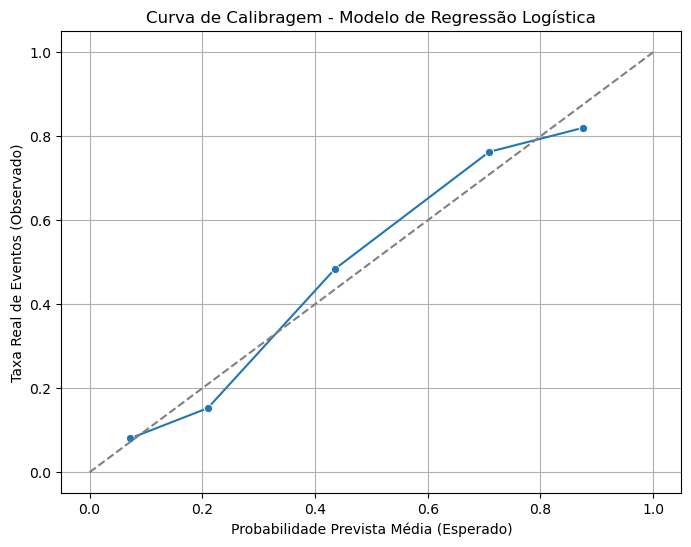

In [16]:
plt.figure(figsize=(8,6))
sns.lineplot(data=df_calib, x='prob_predita_media', y='taxa_evento_real', marker='o')
plt.plot([0, 1], [0, 1], '--', color='gray')  
plt.xlabel('Probabilidade Prevista Média (Esperado)')
plt.ylabel('Taxa Real de Eventos (Observado)')
plt.title('Curva de Calibragem - Modelo de Regressão Logística')
plt.grid(True)
plt.show()


5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [18]:
y_prob = modelo.predict(X) 
y_true = y  

y_pred = (y_prob >= 0.5).astype(int)
acuracia = accuracy_score(y_true, y_pred)
print(f'Acurácia: {acuracia:.4f}')


Acurácia: 0.7954


In [19]:
ks_stat, p_value = ks_2samp(
    y_prob[y_true == 1], 
    y_prob[y_true == 0]   
)
print(f'KS: {ks_stat:.4f}')


KS: 0.5930


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [24]:
variaveis = ['flag_doente', 'sex', 'cp', 'trestbps', 'age', 'thalach', 'oldpeak', 'exang', 'slope', 'ca', 'thal']
df_novo = df[variaveis].copy()

df_novo.replace('?', np.nan, inplace=True)
df_novo = df_novo.dropna()
df_novo = df_novo.astype(float)

variaveis_cat = ['sex', 'cp', 'exang', 'slope', 'ca', 'thal']
df_dummies = pd.get_dummies(df_novo, columns=variaveis_cat, drop_first=True, dtype=float)

y = df_dummies['flag_doente']
X = df_dummies.drop(columns='flag_doente')

X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

X = X.dropna()
y = y.loc[X.index]

X = sm.add_constant(X)

modelo2 = sm.Logit(y, X).fit()

print(modelo2.summary())



Optimization terminated successfully.
         Current function value: 0.315298
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            flag_doente   No. Observations:                  297
Model:                          Logit   Df Residuals:                      280
Method:                           MLE   Df Model:                           16
Date:                Wed, 16 Jul 2025   Pseudo R-squ.:                  0.5431
Time:                        23:24:57   Log-Likelihood:                -93.644
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 2.004e-38
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.5111      2.858     -1.928      0.054     -11.113       0.091
trestbps       0.0272      0.